# SVM kernels

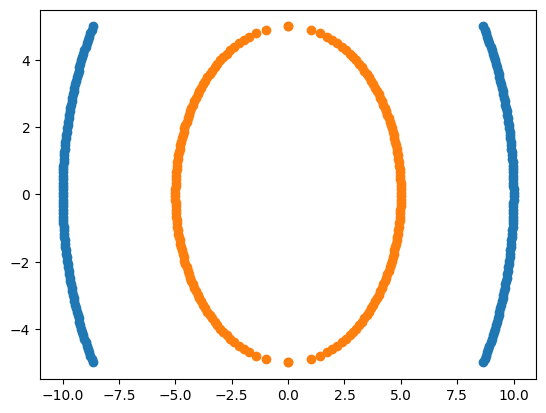

In [47]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
x= np.linspace(-5, 5, 100)
y= np.sqrt(10**2- x**2)
y=np.hstack([y,-y])
x=np.hstack([x,-x])
x1 = np.linspace(-5.0, 5.0, 100)
y1 = np.sqrt(5**2 - x1**2)
y1=np.hstack([y1,-y1])
x1=np.hstack([x1,-x1])
plt.scatter(y,x)
plt.scatter(y1,x1)

In [48]:
import pandas as pd
df1= pd.DataFrame(np.vstack([y,x]).T, columns=[ 'X1', 'X2'])
df1['Y'] = 0
df2= pd.DataFrame(np.vstack([y1,x1]).T, columns=[ 'X1', 'X2'])
df2['Y'] = 1
df = pd.concat([df1, df2], ignore_index=True)
df.head(5)

,X1,X2,Y
0,8.660254,-5.00000,0
1,8.717792,-4.89899,0
2,8.773790,-4.79798,0
3,8.828277,-4.69697,0
4,8.881281,-4.59596,0


In [49]:
# Independent and dependent feaatures
X= df.iloc[:, :2]
y= df.Y

In [50]:
# Split the dataset into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

# Linear Kernel

In [51]:
from sklearn.svm import SVC
classifier= SVC(kernel= "linear")
classifier.fit(X_train, y_train)

SVC(kernel='linear')

In [52]:
from sklearn.metrics import accuracy_score
y_pred= classifier.predict(X_test)
accuracy_score(y_test, y_pred)

0.45

# Radial Kernel

In [59]:
classifier= SVC(kernel= "rbf")
classifier.fit(X_train, y_train)

SVC()

In [60]:
from sklearn.metrics import accuracy_score
y_pred = classifier.predict(X_test)
accuracy_score(y_test, y_pred)

1.0

# Polynomial kernel

In [53]:
# We need to find components for the Polynomical Kernel
#X1,X2,X1_square,X2_square,X1*X2
df['X1_Square']= df['X1']**2
df['X2_Square']= df['X2']**2
df['X1*X2'] = (df['X1'] *df['X2'])
df.head()

,X1,X2,Y,X1_Square,X2_Square,X1*X2
0,8.660254,-5.00000,0,75.000000,25.000000,-43.301270
1,8.717792,-4.89899,0,75.999898,24.000102,-42.708375
2,8.773790,-4.79798,0,76.979390,23.020610,-42.096467
3,8.828277,-4.69697,0,77.938476,22.061524,-41.466150
4,8.881281,-4.59596,0,78.877155,21.122845,-40.818009


In [54]:
### Independent and Dependent features
X = df[['X1','X2','X1_Square','X2_Square','X1*X2']]
y = df['Y']

In [55]:

X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size = 0.25,   random_state = 0)
                                                   
                                                  

In [57]:
classifier= SVC(kernel= "linear")
classifier.fit(X_train, y_train)
y_pred= classifier.predict(X_test)
accuracy_score(y_test, y_pred)

1.0

# Now check for spherical data
consider two concentric spheres. output will be 1 for bigger and 0 for smaller

In [61]:
# Function to generate points inside a sphere
def generate_sphere_data(radius, n_points):
    # Random spherical coordinates
    theta = np.random.uniform(0, np.pi, n_points)  # polar angle
    phi = np.random.uniform(0, 2 * np.pi, n_points)  # azimuthal angle
    r = radius * np.cbrt(np.random.uniform(0, 1, n_points))  # radius to ensure uniform distribution
    
    # Convert spherical to Cartesian coordinates
    x1 = r * np.sin(theta) * np.cos(phi)
    x2 = r * np.sin(theta) * np.sin(phi)
    x3 = r * np.cos(theta)
    
    return np.vstack([x1, x2, x3]).T

In [62]:
# Parameters
n_points_small = 1000  # Number of points for the smaller sphere
n_points_big = 1000    # Number of points for the bigger sphere
radius_small = 2       # Radius of the small sphere
radius_big = 5         # Radius of the big sphere

In [63]:
# Generate data for small sphere (y = 0)
data_small = generate_sphere_data(radius_small, n_points_small)
y_small = np.zeros(n_points_small)  # Label 0 for small sphere

# Generate data for big sphere (y = 1)
data_big = generate_sphere_data(radius_big, n_points_big)
y_big = np.ones(n_points_big)  # Label 1 for big sphere

In [64]:
# Combine the data
X = np.vstack([data_small, data_big])
y = np.concatenate([y_small, y_big])

# Create a DataFrame for the data
df = pd.DataFrame(X, columns=['X1', 'X2', 'X3'])
df['Y'] = y

In [65]:
print(df.head())

         X1        X2        X3    Y
0 -0.836648 -0.574940 -1.275351  0.0
1 -0.836929  0.949018 -1.517460  0.0
2 -0.476696  0.664673  1.520512  0.0
3  0.432562  0.107458  1.544559  0.0
4  0.839764 -0.944507  1.395715  0.0


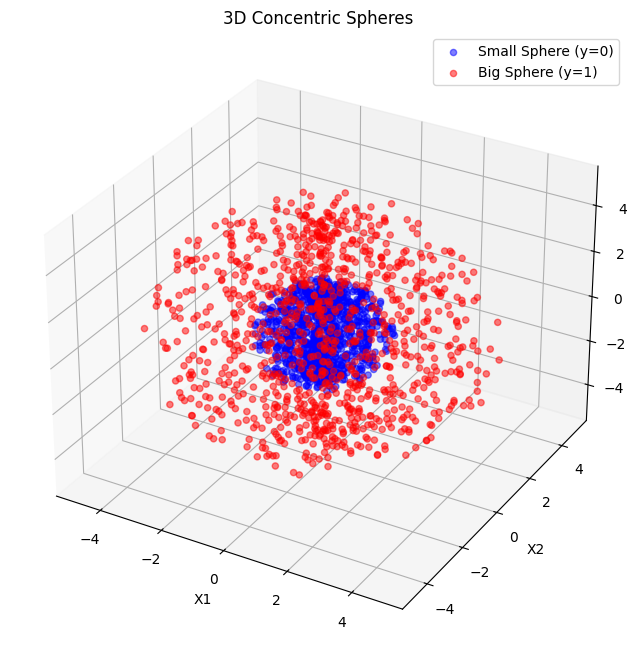

In [66]:
#Visualization
from mpl_toolkits.mplot3d import Axes3D

# Separate the data into small and big spheres
small_sphere = df[df['Y'] == 0]
big_sphere = df[df['Y'] == 1]

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the small sphere (y=0) with a blue color
ax.scatter(small_sphere['X1'], small_sphere['X2'], small_sphere['X3'], c='b', label='Small Sphere (y=0)', alpha=0.5)

# Plot the big sphere (y=1) with a red color
ax.scatter(big_sphere['X1'], big_sphere['X2'], big_sphere['X3'], c='r', label='Big Sphere (y=1)', alpha=0.5)

# Set labels
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')

# Set the title
ax.set_title('3D Concentric Spheres')

# Show the legend
ax.legend()

# Display the plot
plt.show()


In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size = 0.25,   random_state = 0)

In [81]:
model= SVC(kernel= "rbf")
model.fit(X_train, y_train)
y_pred= model.predict(X_test)
accuracy_score(y_test, y_pred)

0.956